# ANN: Artificial Neural Networks (Redes Neuronales Artificiales)
un punto muy importante:

* Es el [aproximador universal](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Casi todas las funciones de $\mathbb{R}^n$ en $\mathbb{R}^m$ se pueden aproximar con una red neuronal. Cibenko lo propo por primera vez usando activaciones sigmoid.  Se neceista que la profunidad de la red (lo explico en minutos) sea $d=\max \{n+1, m \} $

# Motivacion.
Piense en una imagen en pixeles. Por simplicidad gris, con $100 \times 100$ pixeles. Vamos a asumir que este problema de identificar la imagen, clasificar, se puede resolver con regresion logistica. Usamos polinomios para resolver el problema, con el fin de identificar el "decisionboundary". El polinomio de grado mas pequenho que no sea lineal es el cuadratico. Cada pixel es una variable.

El polinomio de grado 2 en $n$ variables lo podemos escribir explicitamente como

$$\theta_0 + \theta_1 x_1 + \cdots \theta_n x_n + \theta_{n+1} x_1 x_2 +
\cdots + \theta_m x_{n-1} x_n + \theta_{m+1} x_1^2 + \cdots \theta_q x_n^2  $$

La pregunta es, quien es $q$? Lo estimamos con conteo (combinatoria)
ver Apendice D formula D.3.4. Veamos como se hace el conteo.
El numero de terminos (parametros) de esta ecuacion es $q+1$.

Cada termino tiene es de la forma $\theta_i$ como coeficiente de

$$1^{i_0} x_1^{i_1} \cdots x_n^{i_n} $$


donde
$$i_0 + i_1 + \cdots i_n=2 \tag{1} $$.


Por ejemplo el coeficiente de $\theta_0$ (que es 1) se obtiene de esta expresion con $i_0=2, i_j=0$, $j=1,2, \cdots, n$. El termino $\theta_n x_n$ se obtiene con $i_0=1, i_n=1$, $j=1,2, \cdots, n-1=0$. El ultimo termino
es $\theta_q x_n^2$, se obtiene con $i_0=0, i_n=2$, $i_j=0$, $j=1,2, \cdots, n-1$.  
La combinatoria me dice que de cuantas formas puedo yo sumar $n+1$ terminos todos de valor $0,1,2$ para obtener el numero 2. Estas es la ecuacion (1).

La formula (D.3.4) del apendice D resuelve este problema. Es decir para un polinomio en $n$ variables de orden 2 se tiene

$$\binom{n+2}{2} $$
En general el problema

$$i_0 + i_1 + \cdots i_n=k  $$.
de expresar un polinomio en $n$ variables de orden $k$ esta dado por

$$\binom{n+k}{k} = \binom{n+k}{n} = \frac{(n+k)!}{k! n!}  \tag{2} $$

Vamos a ver casos particulares. Cuantos terminos tiene un polinomio de segundo orden en 2 variables.

Solucion:
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2 $$
Esto 6 terminos ($q=5$).
Comprobemos nuestra formula (2) $n=2,k=2$

$$\binom{2+2}{2} = \binom{4}{2} = \frac{4!}{2! 2!}= \frac{4 \times 3 \times 2}{2!} = \frac{12}{2}= 6 $$




Recordemos el caso de 100x100 pixeles. Son 10000 variables.
Lo mas simple (no lineal) es un polinomio de orden 2. Contemos el numero de terminos

$$\binom{10002}{10000}= \frac{10002!}{10000! \times  2!}= \frac{10002 \times 10001 \times 10000!}{10000! \times 2!}= \frac{10002 \times 10001}{2} = 50015001.0
 $$

Un paso mas alla. Polinomios de grado 3

$$\binom{10003}{10000}= \frac{10003!}{10000! \times  3!}= \frac{10003 \times 10002 \times 10001 \times  10000!}{10000! \times 3!}= \frac{10003 \times 10002 \times 10001}{6} = 166766685001.0$$.
Esto es mas que $10^{11}$. Esos son parametros $\theta$, el tamanho de la matriz es $m \times n$, donde en general $m > n$, y $n$ es el numero de parametros. O sea que la matriz es mas grande que $n^2$, o sea mas que $10^{22}$.

Esto no cabe en los computadores de hoy. Entonces debemos abandonar el problema de regresion logistica para encontrar un "decision  boundary" en una imagen de 100x100 pixeles. Aca el ANN viene al rescate.

Las ANN son mucho mas eficientes en el almacenamiento y proceso de datos.

## Historia
En las notas de clase tengo 6 articulos. Aca solo miramos los mas importantes. (2 o 3).

* 1943 Dos cientiricos: Warren McCulloch (neurofisiologo) y Walter Pitts (joven matematico) crearon un modelo con circuitos electricos convierte senhales continuas del cerebro en en senhales discretas logicas. Hoy veremos este modelo con mucho detalle.

* En 1958, Frank Rosenblatt creo un modelo mas general que el de McCulloch-Pitts llamado el **Perceptron**. Este modelo implica una cantidad de entradas con pesos para obtener una suma ponderada que es comparada con un umbral y determinar si la senhal pasa o no pasa.
La Grafica 3.53 ilustra este trabajo.



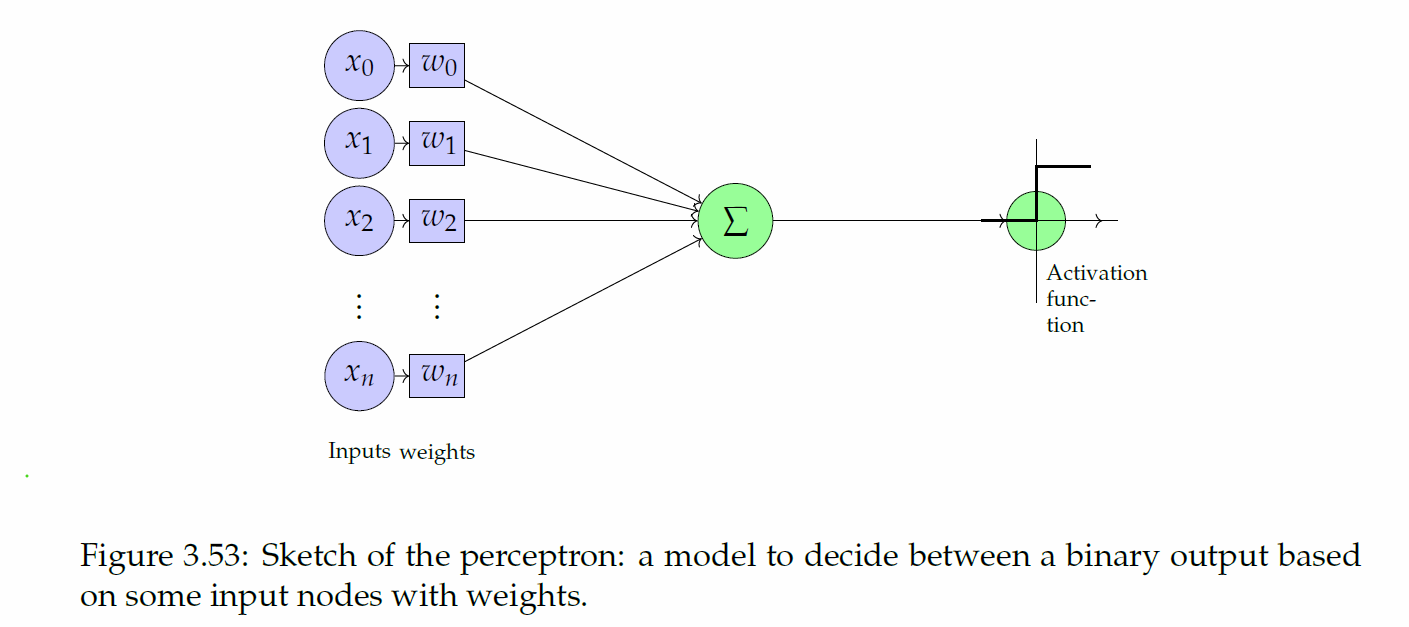

Un ejemplo juguete.
Suponga que usted quiere ir a un paseo. Pero su decision depende de muchos factores (datos).

1. Distancia desde mi casa
2. Modo de viaje: avion, carro, pie , bote
3. Clima
4. costo de hotel y transporte.
5 etc.

Pero para tomar la decision esta depende de muchos parametros (features)

1. Que tanto le gusta viajar lejos de casa.
2. Que tal viajar en avion? o en bote?
3. Que tal es para temperaturas bajo cero?
4. Cuanta plata esta dispuesto a gastar?

Al final su decision depende de una suma ponderada de los datos (arriba) con estos "features" abajo.  La ultima lista tiene uno pesos
Pueden ser positivos para cosas que nos gustan y negativos para cosas que nos disguntan.

Las ANN tambien han sufrido del "winter". Pero con el desarrollo del hardward (GPU) y otras cosas ya salieron del "winter". Hoy en dia las LLM son redes neuronales muy poderosas y usadas a diario por millones de personas.

La idea de red neuronal, en parte esta motivada por el sistema biologico.o




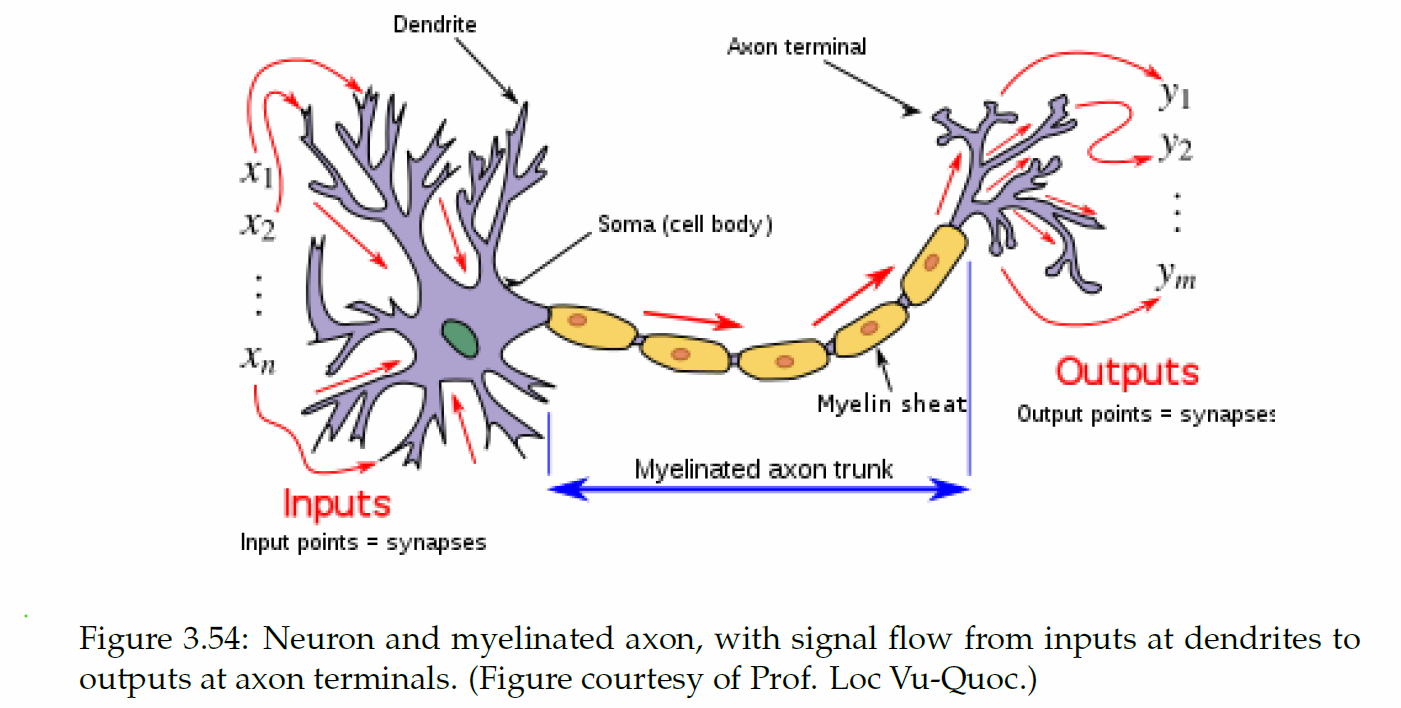

# Modelo McCulloch-Pitts.
Los modelos son logicos.
Este modelo es mas limitado que el Perceptron por que usualmente es binario, y los pesos son 1,0,-1. En el perceptron los pesos son reales (pueden ser decimales) y no es necesariamente binario.


Vamos a ver

* "or"
* "and"
* "nor"
* "xor"
* "no"

## El modelo "or" (disjuntiva "o").
|  $x_1$ |  $x_2$ | $$\sum x_i=x_1 + x_2$$ | $$\ge \text{threshold}$$  |  $$x_1 \text{ or } x_2$$ |
|---|---|:--------:|-------|:-------:|
| 1  |  1 |   2|  1 |  1 |
|  1 |  0 |  1 |   1|  1 |
| 0  |  1 | 1  |  1 |  1 |
| 0  |  0 | 0  |  1 |  0 |

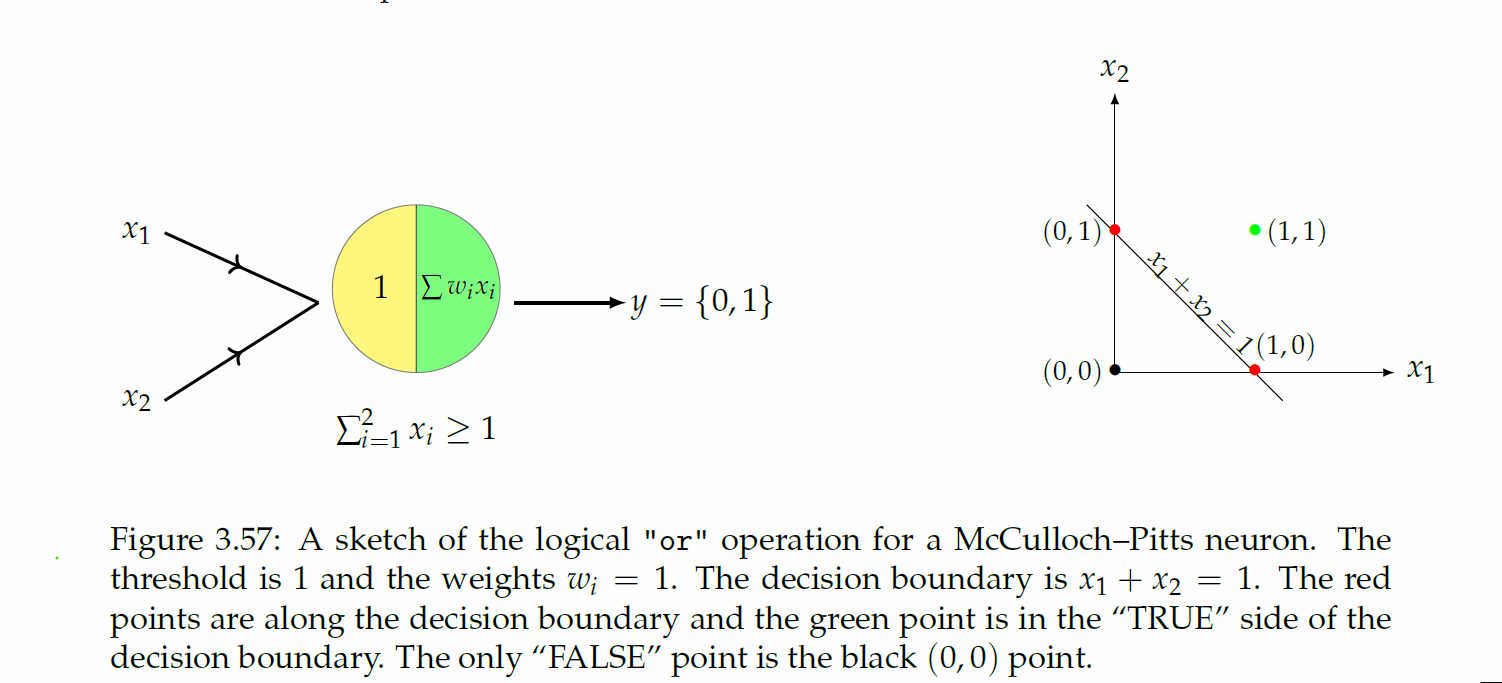

## Medelo conjuncion "y" ("and").

El modelo **and** (y) de McCulloch-Pitts es:

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ and } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | 2 | 1 |
| 1 | 0 | 1 | 2 | 0 |
| 0 | 1 | 1 | 2 | 0 |
| 0 | 0 | 0 | 2 | 0 |



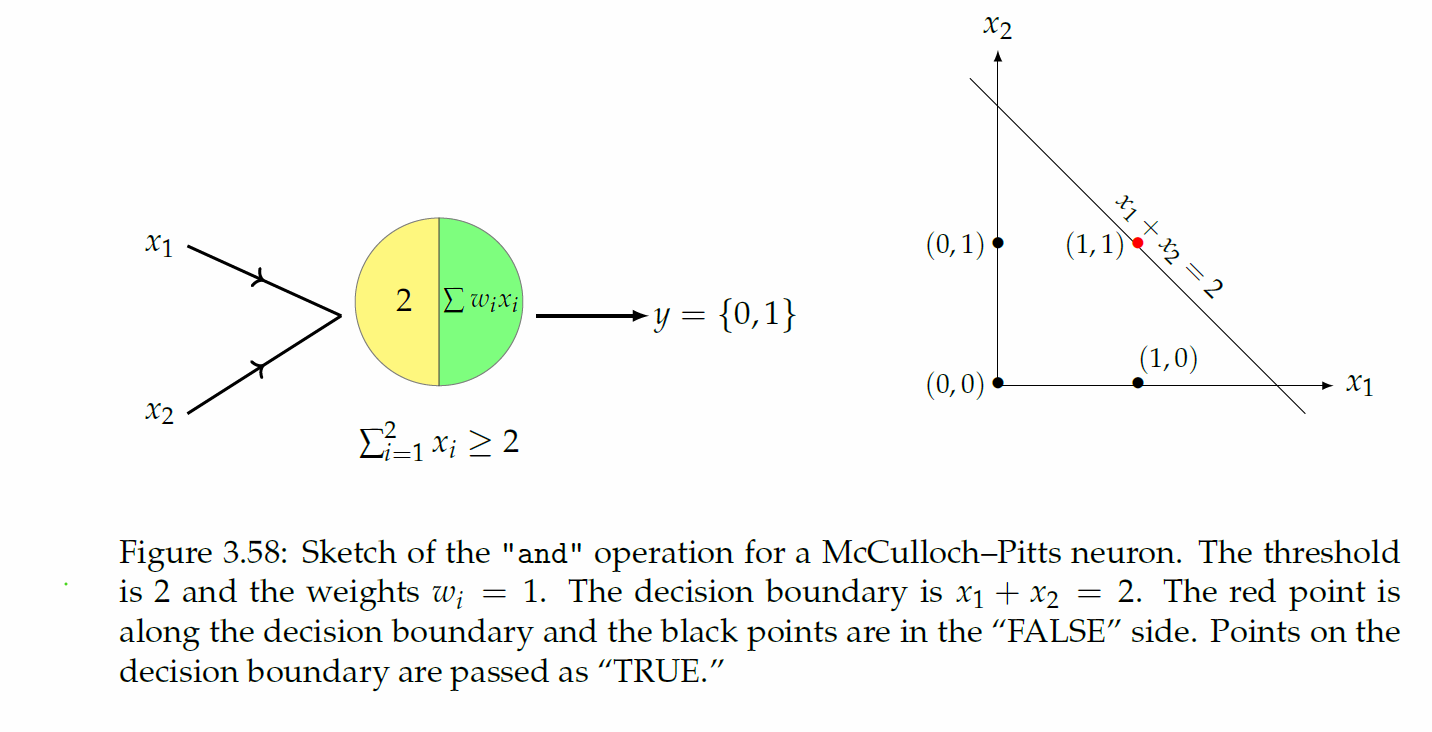

## Nor (ni lo uno ni lo otro)
es la conjuncion (and) de la negacion de ambos.


| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = -x_1 -x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ nor } x_2 $$ |
| ------ | ----- |:-------:|:-----:|:-----:|
| 1 | 1 | -2 | 0 | 0 |
| 1 | 0 | -1 | 0 | 0 |
| 0 | 1 | -1 | 0 | 0 |
| 0 | 0 | 0 | 0 | 1 |

## "XOR"
El "o" exclusivo. Es decir solo uno pasa. Uno o el otro pero no los dos.

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ xor } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |

No existe un umbral que resuelva este problema.
El XOR motiva a la introduccion de modelos mas generales. Que veremos a continuacion.

## Funciones de activacion.
En las neuronas biologicas existen. Corrientazos electricos que impultan el cerebro a reaccionar de alguna forma.  La mision mas importante de las funciones de activacion es quebrar la linealidad. Sin ellas un ANN seria simplemente una regresion lineal.

Veremos el uso de estas cuando construyamos las ANN.

### La identidad.
La identidad hace nada. Puede ser usada para simular regresion lineal, o simplemente dejar una conexion sin cambio.

### La heaviside (step funcion, escalalon)

$$H(t)
=
\begin{cases}
1 \quad, \quad \text{si } t > 0 \\
0 \quad, \quad \text{si } t \le 0 \\
\end{cases}
 $$

Text(0, 0.5, 'Heaviside(t)')

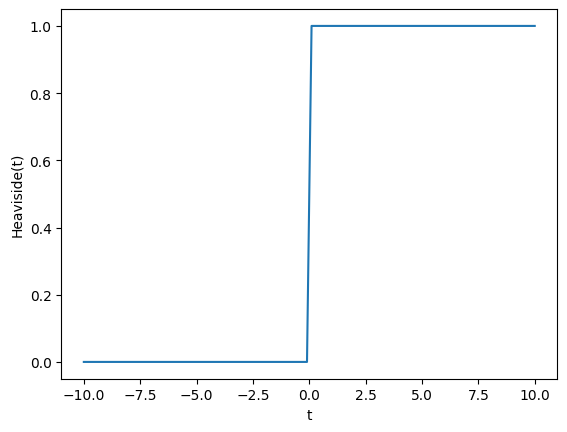

In [3]:
# graficamos la funcion Heavisde
import numpy as np
import matplotlib.pyplot as plt

# definamos la funcion Heavisde
def heaviside(t):
    if t > 0:
        return 1
    else:
        return 0

# graficamos la funcion Heaviside
t = np.linspace(-10, 10, 100)
plt.plot(t, [heaviside(x) for x in t])
plt.xlabel('t')
plt.ylabel('Heaviside(t)')


### Sigmoid logistic

$$\sigma(t) = \frac{1}{1 + \exp(-t)} $$

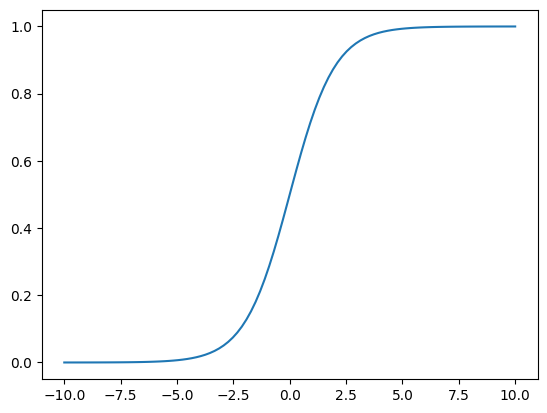

In [4]:
# graficamos la funcion sigmoid logistic

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-10, 10, 100)
plt.plot(t, [sigmoid(x) for x in t])

Note que cuando $x \gg 1$ la funcion se **aplana** y esto es malo por que genera un problema llamado **vanishing gradient**.  Si el gradiente es muy pequenho, el sistema de aprender. Por que?

$$\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla J(\theta^{(i)}) $$
Si $\nabla J(\theta^{(i)} \approx 0$, entonces

$$\theta^{(i+1)} \approx \theta^{(i)} $$

### Tangente hiperbolida tanh

$$\tanh(t) = \frac{\sinh (t)}{\cosh(t)} = \frac{\exp(t) - \exp(-t)}{\exp(t) + \exp(-t)} = etc $$

La graficamos en `Python`

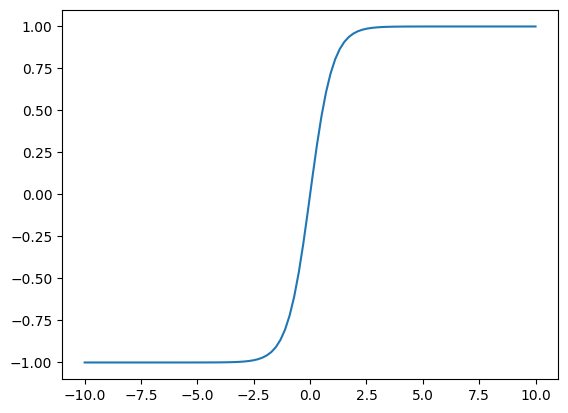

In [5]:
# graficamos la tanh
def tanh(t):
    return (np.exp(t) - np.exp(-t)) / (np.exp(t) + np.exp(-t))

t = np.linspace(-10, 10, 100)
plt.plot(t, [tanh(x) for x in t])

Esta funcion tambien sufre de el problema del "vanishing gradient"
Por esto en los 2000 se invento una funcion que se llama la ReLU (Rectified Linear Unit).

$$ReLU(t) = \max \{ 0, t \} =
\begin{cases}
t \quad , \quad \text{si } t > 0 \\
0 \quad , \quad \text{si } t \le 0 \\
\end{cases} $$

La graficamos en `Python`


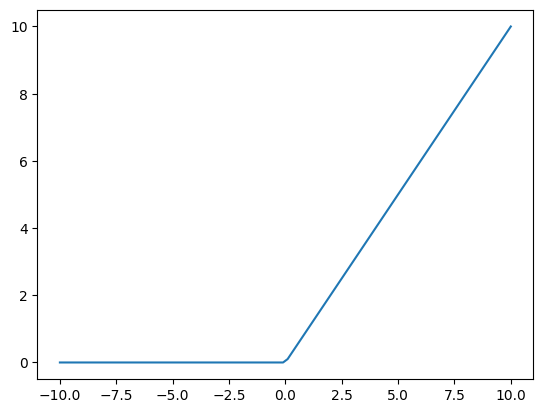

In [6]:
# graph the function ReLU
import numpy as np
import matplotlib.pyplot as plt

def relu(t):
    return np.maximum(0, t)

t = np.linspace(-10, 10, 100)
plt.plot(t, [relu(x) for x in t])


Esta no sufree del "vanishing gradient" (por lo mentos para argumentos positivos). Para argumentos negativos puede surfrir y a esto se le llama "The dying ReLU neuron". Por esto se creo otra que no tenga este problema.

Por esto se creo al "Leaky ReLU"

$$
\text{Leaky ReLU}(t) =
\begin{cases}
at \quad , \quad \text{si } t < 0 \\
t \quad , \quad \text{si } t > 0 \\
\end{cases}
$$
generalmente $a$ es pequenho.
Vamos a graficarla en `Python`

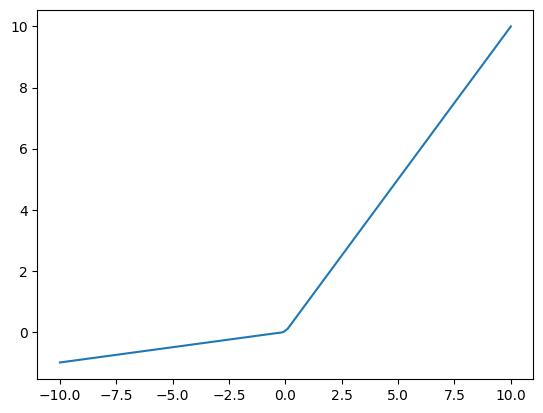

In [8]:
# graph the leaky relu
import numpy as np
import matplotlib.pyplot as plt

# define the leaky relu
def leaky_relu(t, a=0.1):
    return np.maximum(a*t, t)

t = np.linspace(-10, 10, 100)
plt.plot(t, [leaky_relu(x) for x in t])


La Leaky ReLU presenta una discontinuidad en la derivada en 0. Para suavizarla se introdujo la ELU: Exponential Linear Unit.

$$\text{Elu}(t) =
\begin{cases}
\alpha ( \mathrm{e}^{t} - 1) \quad , \quad \text{si } t < 0  \\
t  \quad , \quad \text{si } t > 0  \\
\end{cases} $$
Si $\alpha=1$ hay continuidad en la deriva (tarea de calculo diferencial).

La graficamos en `Python`

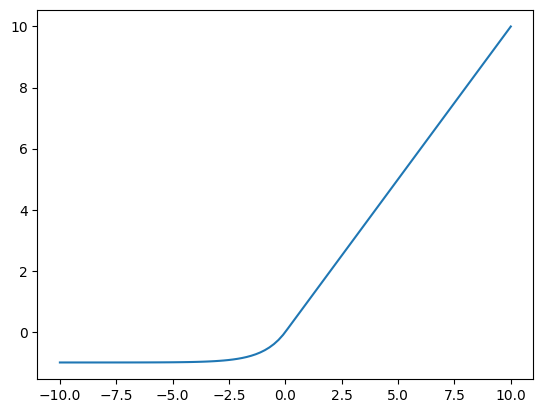

In [9]:
# graph the Elu function
import numpy as np
import matplotlib.pyplot as plt

# define the Elu function
def elu(t, alpha=1):
    return np.where(t < 0, alpha * (np.exp(t) - 1), t)

# graph the Elu function
t = np.linspace(-10, 10, 100)
plt.plot(t, [elu(x) for x in t])


### La softmax.
La vimos en clases anteriores cuando se tiene multiclase.


La ultima importante es la **softmax** (explicada en la clase anterior.)

Esta una funcion (activacion) de probabilidad que arroja $K$ resultados para $K$ clases.
Es una generalizacion de la logistic sigmoid $\sigma$

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)} \quad , \quad i=1,2, \cdots , K \quad , \quad z_i \in \mathbb{R}.
\end{eqnarray}
Esta funcion tiene la caracteristica de que es positiva con rango en $[0,1]$. Las commponentes $\sum_{i=1}^K \sigma(z_i)=1$


[Keras](https://keras.io/api/layers/activations/) contiene una libreria de funciones de activacion muy completa. Muchas mas de las que mostramos aca. Pero las que mostramos son las mas populares.

# MPL: Multilayer Perceptron
* Propagacion hacia adelante (Forward Propagation)
* Propagacion hacia atras. (Backpropagation).


## Propagacion hacia adelante.
Vamos a empezar desde los modelos mas simples hasta los mas complicados.

### Un node (neurona) de entrada uno oculto uno de salida.


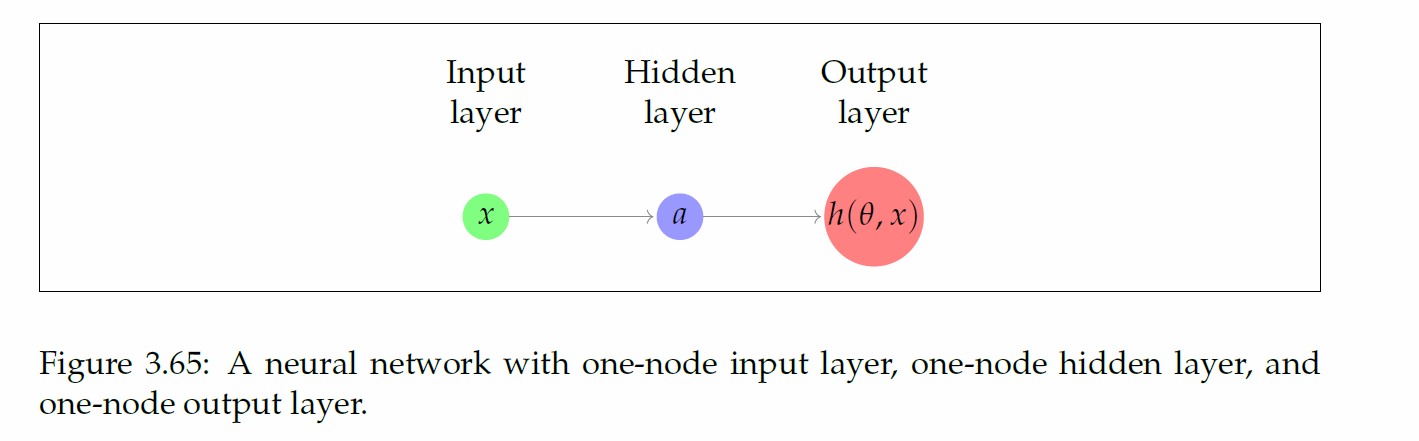

En lo que sigue usamos como funcion de activacion la sigmoid ligistics.
La matematica es

* Datos de entrada. Es un escalar $x$.
* El escalar $x$ se pesa con un peso $\theta^{(1)}$
$$z^{(2)} = x \theta^{(1)}  $$

* Calcule la **activacion** $a^{(2)}$ en la capa 2.

$$a^{(2)} = \frac{1}{1 + \exp(-z^{(2)})} = \frac{1}{1 + \exp(-x \theta^{(1)})} $$

* Calculamos la parte lineal para llegar llegar a la salida

$$z^{(3)} = a^{(2)}\theta^{(2)}. $$

* Calculamos la **activacion**
La ultima activacion es la hipotesis

$$a^{(3)} = h(\theta, x) =  \frac{1}{1 + \exp(-z^{(3)})} $$

### Varios nodos de entrada uno oculto y uno de salida

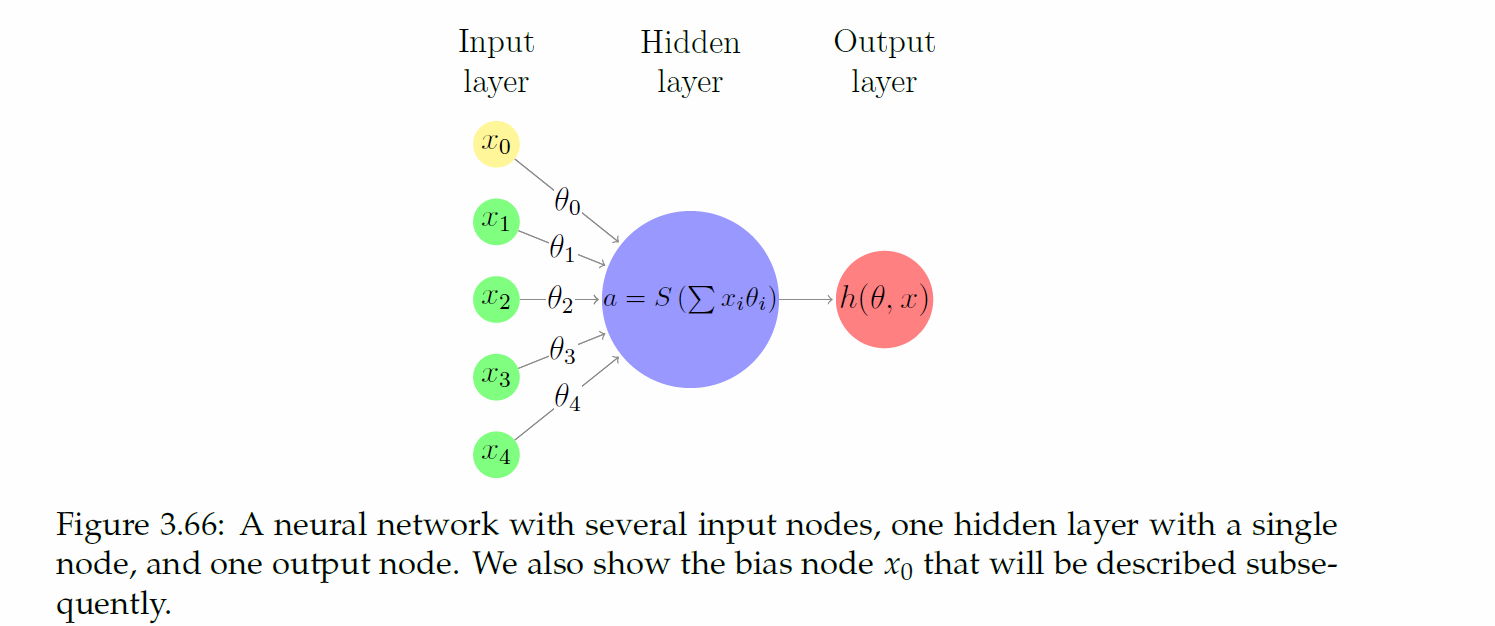

* Se pesan las entradas con los pesos $\theta_i$

$$z^{(2)} = \sum_{i=0}^n x_i \theta_i = \langle x, \theta \rangle  $$

* Se activa este valor con la activacion Sigmoid $S$

$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \exp(-z^{(2)})} $$

* vamos para salida, o capa 3.
    * Parte lineal
$$z^{(3)} = a^{(2)} \theta^{(2)}  $$
    * Parte no lineal
$$a^{(3)} = h(\theta, x) = \frac{1}{1 + \exp(-z^{(3)})} $$

### Varios nodos de entrada, varios ocultos, uno de salida.



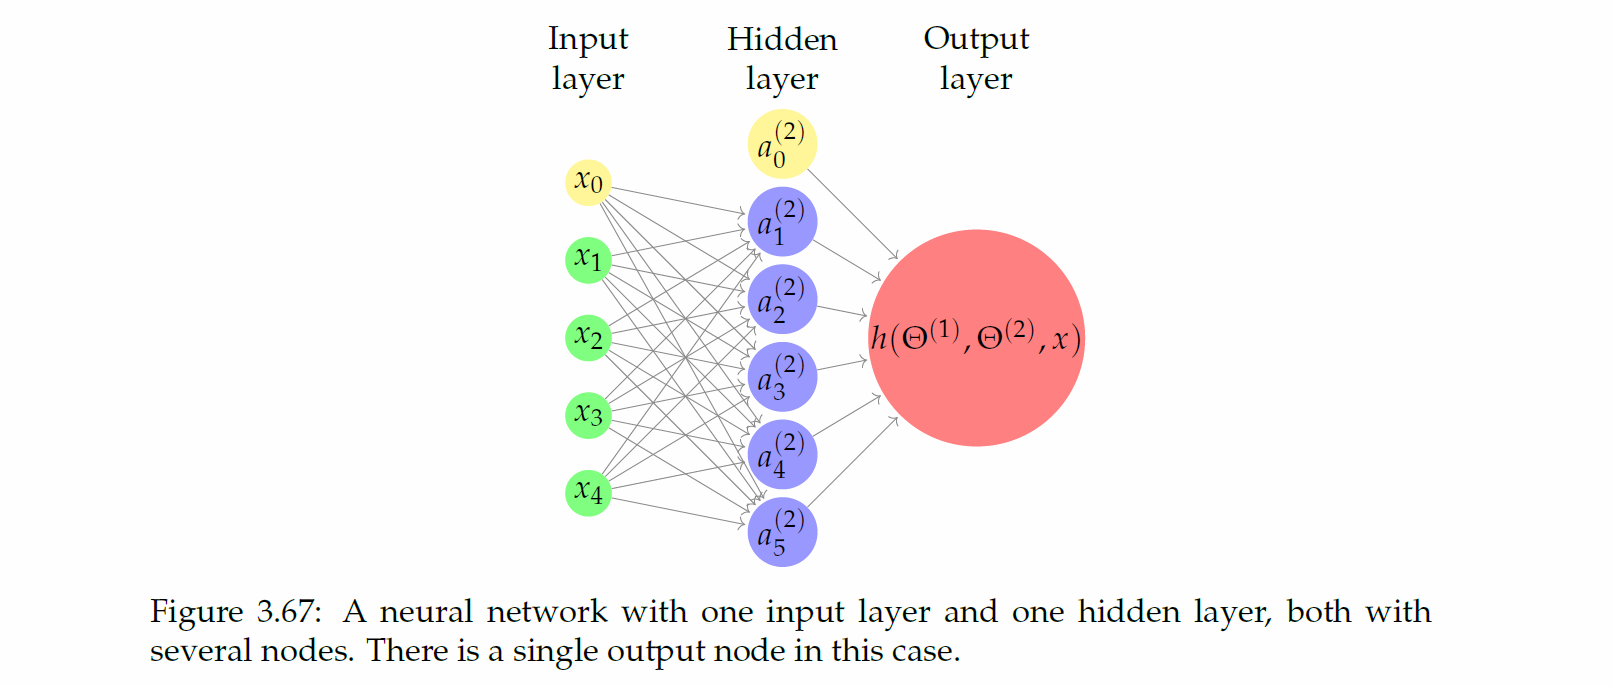

* Datos de entrada
    * Parte lineal
 $$z_j^{(2)} = \sum_{i=0}^n x_i \theta_{ji}^{(1)} = \langle x , \theta_j^{(1)} \rangle $$
 Mejor dicho
 $$ z^{(2)} = x \Theta$$
 donde $x$ es un vector fila. Mas concretamente, escribiendo un poco mejor

 $$ z^{(2)} = x^T \Theta$$
 Si queremos que la salida sea un vector columna, lo transponemos

 $$ z^{(2)} = \Theta^T x$$
    * Parte no lineal
$$a_j^{(2)} = S(z_j^{(2)}) = \frac{1}{1  + \exp(-z_j^{(2)})}$$
donde $j=0,1, \cdots, p$.

### Varios de entrada, varios ocultos y varios de salida.

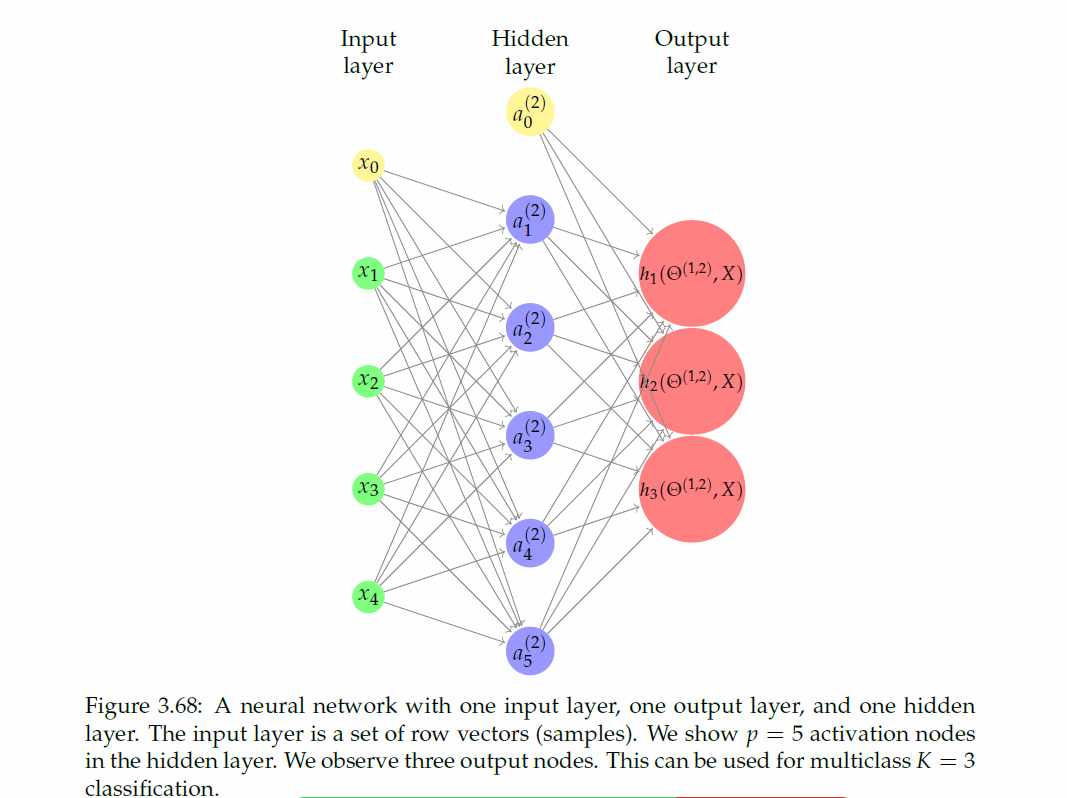

* De los datos de entrada
    * Proceso lineal
    Repetimos el caso anterior
$$z^{(2)} = (\Theta^{(1)})^T x $$
    * activacion
    En forma vectorial (componente a compente)
$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \exp(- z^{(2)})} $$
Esta ultima ecuacion es componente-a-componente
es decir

$$a_j^{(2)} = S(z_j^{(2)}) = \frac{1}{1 + \exp(- z_j^{(2)})} $$
donde $j=0,1, \cdots, p$.

* Del Proceso lineal
    Repetimos el caso anterior
$$z^{(3)} = (\Theta^T)^{(2)} a^{(2)} $$
    * activacion
    En forma vectorial (componente a compente)
$$a^{(3)} = S(z^{(3)}) = \frac{1}{1 + \exp(- z^{(3)})} $$
Esta ultima ecuacion es componente-a-componente
es decir

$$a_j^{(3)} = S(z_j^{(3)}) = \frac{1}{1 + \exp(- z_j^{(3)})} $$
donde $j=0,1, \cdots, p$.
e la capa oculta a la salida

* Ultimo caso, vectores de entrada, varios ocultos y varios nos de salida.
Los vectores de entrada forman una matriz $X_{m \times n}$ la cual es multiplicada por los pesos $\Theta^{(1)}$ de igual forma al analisis anterior

* La parte lineal es
$$z^{(2)} = (\Theta^{(1)})^T X $$

* La parte no linea es
$$a^{(2)} = S(z^{(2)} = \frac{1}{1  + \exp(-z^{(2)})} $$
como $a,z$ son matrices

$$a_{ij}^{(2)} = S(z_{ij}^{(2)} = \frac{1}{1  + \exp(-z_{ij}^{(2)})} $$

* Vamos para la salida desde los nodos ocultos.

    * Parte lineal
$$z^{(3)} = (\Theta^{(2)})^T a^{(2)}  $$
    * Parte no lineal
$$a^{(3)} = S(z^{(2)}) = h(\Theta, x) =  \frac{1}{1  + \exp(-z^{(3)})} $$
como $a,z$ son matrices

$$h_i(\Theta, x) = \frac{1}{1 + \exp(- z_i^{(3)})}$$


 # Siguiente Clase:
* Escribimos el pseudo-codigo de la propagacion hacia adelante
* Estudiamos la "backpropagation".
